At snapshot, get all orbit data for every pair

This notebook will pull and save orbits with data:

- (float) Redshift 
- (flaot) Scale
- (int) GroupNum
- (int) SubID1
- (int) SubID2
- (float) Sub1StellarMass
- (float) Sub2StellarMass
- (obj) Group Flag vs. z
- (obj) Merge Flag vs. z
- (int) Merger snapshot 
- (float) Merger redshift 
- (float) Starting Redshift (FOF Group Infall)
- (int) Starting Snapshot (FOF Group Infall)
- (obj) Pos1 vs. z 
- (obj) Pos2 vs. z
- (obj) Sep vs. z
- (obj) Vel1 vs. z
- (obj) Vel2 vs. z
- (obj) RelVel vs. z
- (float) Separation before merger
- (int) Pairkey (maybe the SubhaloID 1+2 at z=4)


idea: Maybe need to add nans into columns where they don’t have a separation (so that I only have to save the time/redshift/etc. once)~



In [2]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
import sys
import importlib
from astropy.cosmology import FlatLambdaCDM

from utils_orbs.orb_paths import SetupPaths
import utils_orbs.readsubfHDF5Py3 as readSub
# from utils.read_group_cats import ReadCats
from utils_orbs.merger_trees import TraceMergerTree
from utils_orbs.readMergerHistoryFiles import FindHistory
from utils_orbs.vectorCorrection import vectorCorrection as vector
# import utils_orbs.pull_orbitdata_massive

paths = SetupPaths()

In [3]:
plt.show();
plt.rcParams.update({'font.size':20,"xtick.direction":"in","ytick.direction":"in", 
                     "xtick.top":True, "ytick.right":True,"text.usetex":False,
                     "xtick.labelsize":18,"ytick.labelsize":18})

## Make the time, redshift, scale, snapshot conversion file

First, I need to make the sim data arrays, including the time, redshift, and scale at each snapshot. (I might have this as a data file from a long time ago)


In [4]:
if os.path.exists(f"{paths.path_data}big-bad/snapshot_data.hdf5"):
    print ("file already exists")
    
else:    
    ## import simulation snapshot data 
    f = h5py.File(paths.path_data+"simulation.hdf5")

    ## initialize cosmology
    H0 = 100*f['Header'].attrs['HubbleParam']
    Omega0 = f['Header'].attrs['Omega0']
    OmegaB = f['Header'].attrs['OmegaBaryon']
    OmegaL = f['Header'].attrs['OmegaLambda']

    cosmo = FlatLambdaCDM(H0=67.74, Om0=Omega0, Ob0=OmegaB)

    ## initialize data structure
    data_dict = {}
    array_names = ["Snapshot","Redshift","Scale","Lookback Time","Age"]
    for arr in array_names:
        data_dict[arr] = []

    ## create data structure for time, redshift, scale, etc. as fxn of snapshot
    for i in range(100):
        snapshot = i
        redshift = f['Snapshots'][f'{i}']['Header'].attrs['Redshift']
        scale = 1 / (1 + redshift)
        lookback = cosmo.lookback_time(redshift).value
        age = cosmo.age(redshift).value

        data_dict['Snapshot'].append(snapshot)
        data_dict['Redshift'].append(redshift)
        data_dict['Scale'].append(scale)
        data_dict['Lookback Time'].append(lookback)
        data_dict['Age'].append(age)

    ## clsoe data file     
    f.close()

    ## store time data into hdf5 file ~

    f = h5py.File(f"{paths.path_data}big-bad/snapshot_data.hdf5", 'w')

    info_dict = {"Snapshot":"Snapshot number",
                 "Redshift":"Redshift at snapshot",
                 "Scale":"Scale at snapshot",
                 "Lookback Time":"Time that has elapsed from snapshot to z=0 (in Gyr)",
                 "Age":"Age of the Universe (in Gyr)"}

    for key, val in data_dict.items():
        val = np.array(val)
        dset = f.create_dataset(f'/{key}', 
                                shape=val.shape,
                                dtype=val.dtype)
        dset.attrs[key] = info_dict[key]
        dset[:] = val

    f.close()    
    
    print("snapshot information file created")

snapshot information file created


In [52]:
snapdata = h5py.File(f"{paths.path_data}hail-mary/snapshot_data.hdf5","r")
snapdata_dict={}
for key,val in snapdata.items():
    snapdata_dict[key] = np.array(val)
snapdata.close()

note: arrays go from z=0 to z->inf, so the 0 index is z=0.

## Need to get data for the pairs:


first, I'm going to build the arrays of the ids, the snap of merger, and the merger flag. later i'll add in the 2D arrays of positions, velocities, etc. 

- (float) Redshift 
- (flaot) Scale
- (int) GroupNum
- (int) SubID1
- (int) SubID2
- (float) Sub1StellarMass
- (float) Sub2StellarMass
- (obj) Group Flag vs. z
- (obj) Merge Flag vs. z
- (int) Merger snapshot 
- (float) Merger redshift 
- (float) Starting Redshift (FOF Group Infall)
- (int) Starting Snapshot (FOF Group Infall)
- (obj) Pos1 vs. z 
- (obj) Pos2 vs. z
- (obj) Sep vs. z
- (obj) Vel1 vs. z
- (obj) Vel2 vs. z
- (obj) RelVel vs. z
- (float) Separation before merger
- (int) Pairkey (maybe the SubhaloID 1+2 at z=4)

In [9]:
%run ../../orbs/utils_orbs/pull_orbitdata_massive.py 50

Read in all packages and defined snapshot
Redshift
Scale
Snapshot
GroupNum
SubfindID1
SubfindID2
SubhaloMass1
SubhaloMass2
StellarMass1
StellarMass2
StellarMassRatio
MergeFlag
MergeRedshift
MergeSnapshot
InfallRedshift
InfallSnapshot
GroupFlag
Separations
SeparationsComoving
RelativeVelocity
SubhaloPos1
SubhaloPos2
SubhaloVel1
SubhaloVel2
Saved orbit data for snapshot  50


In [4]:
# import os
# import sys
# import h5py
# import numpy as np
# import matplotlib.pyplot as plt
# import sys
# import importlib
# from astropy.cosmology import FlatLambdaCDM

# from utils_orbs.orb_paths import SetupPaths
# import utils_orbs.readsubfHDF5Py3 as readSub
# # from utils.read_group_cats import ReadCats
# from utils_orbs.merger_trees import TraceMergerTree
# from utils_orbs.readMergerHistoryFiles import FindHistory
# from utils_orbs.vectorCorrection import vectorCorrection as vector

# paths = SetupPaths()

full_snaps = np.arange(0,100,1)
little_h = 0.6774

# ----------------------------------------------------
# import pair data
f = h5py.File(f"{paths.path_data}hail-mary/lowmass_40.hdf5", 'r')
pairs = {}
for key, val in f.items():
    if key != "Header":
        pairs[key] = np.array(val) 
f.close()

In [6]:
numpairs = len(pairs['Sub1 ID'])

# ----------------------------------------------------
# import snapshot data to convert comoving units
snapdata = h5py.File(f"{paths.path_data}hail-mary/snapshot_data.hdf5","r")
snapdata_dict={}
for key,val in snapdata.items():
    snapdata_dict[key] = np.array(val)
snapdata.close()

# heading info:
redshift_snap = snapdata_dict['Redshift'][snapdata_dict['Snapshot']==40][0]
scale_snap = snapdata_dict['Scale'][snapdata_dict['Snapshot']==40][0]

In [7]:
# ----------------------------------------------------
# initialize data structures          
# 1D (per pair):
groupnum, id1, id2  = np.zeros((3, numpairs), dtype="int32")
mass1, mass2, stell1, stell2, smratio  = np.zeros((5, numpairs))
merge_flag = np.zeros((numpairs),dtype="bool")
merge_snap, infall_snap = np.zeros((2,numpairs), dtype="int32")
merge_redshift, infall_redshift = np.zeros((2,numpairs))
# pairkey = np.zeros(numpairs,dtype="str")
pairkey = []

In [8]:
# 2D (per pair per snapshot):
seps = np.zeros((numpairs, len(full_snaps)))
seps_comov = np.zeros((numpairs, len(full_snaps)))
vels = np.zeros((numpairs, len(full_snaps)))
seps.fill(np.NaN)
seps_comov.fill(np.NaN)
vels.fill(np.NaN)
group_flag = np.zeros((numpairs,len(full_snaps)),dtype="bool")
pos1, pos2 = np.zeros((2, numpairs, len(full_snaps), 3))
vel1, vel2 = np.zeros((2, numpairs, len(full_snaps), 3))

In [10]:
ind = 0
primary_id = pairs['Sub1 ID'][ind]
secondary_id = pairs['Sub2 ID'][ind]

id1[ind] = primary_id
id2[ind] = secondary_id
mass1[ind] = pairs['Sub1 Mass'][ind]
mass2[ind] = pairs['Sub2 Mass'][ind]
stell1[ind] = pairs['Sub1 Stellar Mass'][ind]
stell2[ind] = pairs['Sub2 Stellar Mass'][ind]
smratio[ind] = pairs['Stellar Mass Ratio'][ind]
groupnum[ind] = pairs['Group ID'][ind]

treedict = {}
for sub in [primary_id,secondary_id]:
    treedict[sub] = TraceMergerTree(snapshot=40,physics="hydro",sim="TNG",subfindID=sub)

tree_primary = treedict[primary_id].mergedbranch
tree_secondary = treedict[secondary_id].mergedbranch

In [12]:
tree_primary.keys()

dict_keys(['DescendantID', 'FirstProgenitorID', 'FirstSubhaloInFOFGroupID', 'GroupBHMass', 'GroupBHMdot', 'GroupCM', 'GroupFirstSub', 'GroupGasMetalFractions', 'GroupGasMetallicity', 'GroupLen', 'GroupLenType', 'GroupMass', 'GroupMassType', 'GroupNsubs', 'GroupPos', 'GroupSFR', 'GroupStarMetalFractions', 'GroupStarMetallicity', 'GroupVel', 'GroupWindMass', 'Group_M_Crit200', 'Group_M_Crit500', 'Group_M_Mean200', 'Group_M_TopHat200', 'Group_R_Crit200', 'Group_R_Crit500', 'Group_R_Mean200', 'Group_R_TopHat200', 'LastProgenitorID', 'MainLeafProgenitorID', 'Mass', 'MassHistory', 'NextProgenitorID', 'NextSubhaloInFOFGroupID', 'NumParticles', 'RootDescendantID', 'SnapNum', 'SubfindID', 'SubhaloBHMass', 'SubhaloBHMdot', 'SubhaloBfldDisk', 'SubhaloBfldHalo', 'SubhaloCM', 'SubhaloGasMetalFractions', 'SubhaloGasMetalFractionsHalfRad', 'SubhaloGasMetalFractionsMaxRad', 'SubhaloGasMetalFractionsSfr', 'SubhaloGasMetalFractionsSfrWeighted', 'SubhaloGasMetallicity', 'SubhaloGasMetallicityHalfRad', 'S

In [16]:
tree_primary['Group_R_TopHat200']

array([241.80376 , 242.60515 , 243.81606 , 245.26865 , 246.75258 ,
       247.40808 , 247.80057 , 247.52464 , 248.04128 , 248.986   ,
       251.60535 , 253.11354 , 253.99376 , 255.63673 , 256.70667 ,
       258.7616  , 260.2499  , 261.07538 , 262.07446 , 262.78265 ,
       262.9979  , 263.38052 , 264.31305 , 265.45944 , 265.9223  ,
       266.35287 , 267.10147 , 267.34985 , 266.3976  , 263.56012 ,
       262.83603 , 263.5182  , 264.00894 , 263.8833  , 263.03134 ,
       262.49765 , 262.473   , 263.2964  , 264.33945 , 262.3847  ,
       262.85425 , 263.90942 , 262.82492 , 262.38934 , 262.28616 ,
       261.22552 , 260.03595 , 258.40347 , 256.8618  , 253.00105 ,
       245.10329 , 241.47539 , 238.17757 , 223.82947 , 204.95583 ,
       210.15373 , 197.54077 , 162.3964  , 177.51393 , 158.36372 ,
       153.33368 , 160.3849  , 136.22948 , 133.09283 , 122.59134 ,
       116.28863 , 109.84197 , 102.50033 ,  95.72956 ,  93.461044,
        91.11664 ,  87.721245,  84.91025 ,  76.1987  ,  65.118

In [17]:
tree_secondary['Group_R_TopHat200']

array([241.80376 , 242.60515 , 243.81606 , 245.26865 , 246.75258 ,
       247.40808 , 247.80057 , 247.52464 , 248.04128 , 248.986   ,
       251.60535 , 253.11354 , 253.99376 , 255.63673 , 256.70667 ,
       258.7616  , 260.2499  , 261.07538 , 262.07446 , 262.78265 ,
       262.9979  , 263.38052 , 264.31305 , 265.45944 , 265.9223  ,
       266.35287 , 267.10147 , 267.34985 , 266.3976  , 263.56012 ,
       262.83603 , 263.5182  , 264.00894 , 263.8833  , 263.03134 ,
       262.49765 , 262.473   , 263.2964  , 264.33945 , 262.3847  ,
       262.85425 , 263.90942 , 262.82492 , 262.38934 , 262.28616 ,
       261.22552 , 260.03595 , 258.40347 , 256.8618  , 253.00105 ,
       245.10329 , 241.47539 , 238.17757 , 223.82947 , 204.95583 ,
       210.15373 , 197.54077 , 162.3964  , 177.51393 , 158.36372 ,
       153.33368 , 160.3849  , 156.52647 , 147.02301 , 135.18687 ,
       131.38626 , 128.3078  , 130.34467 , 129.86916 , 128.77316 ,
       127.47889 , 122.01628 , 112.6291  ,  76.42795 ,  66.418

In [25]:
scale = snapdata_dict['Scale'][40]

In [19]:
loc1 = np.where(tree_primary['SnapNum'] == 40)[0]
loc2 = np.where(tree_secondary['SnapNum'] == 40)[0]


In [20]:
loc1

array([59])

In [21]:
loc2

array([59])

In [22]:
subpos1 = tree_primary['SubhaloPos'][loc1] # comov
subpos2 = tree_secondary['SubhaloPos'][loc2] # comov

In [26]:
comoving_dist = np.linalg.norm(vector(subpos1,subpos2,75000))
seps_comov = comoving_dist
seps = comoving_dist*(scale)/little_h

In [27]:
rvir_comov = tree_primary['Group_R_TopHat200'][loc1]
rvir_phys = rvir_comov*scale/little_h

In [29]:
seps/rvir_phys

array([1.9804761], dtype=float32)

In [30]:
seps_comov/rvir_comov

array([1.9804763], dtype=float32)

In [ ]:
for ind in range(numpairs):
    # ----------------------------------------------------
    # get info and trees for primary and secondary
    primary_id = pairs['Sub1 ID'][ind]
    secondary_id = pairs['Sub2 ID'][ind]

    id1[ind] = primary_id
    id2[ind] = secondary_id
    mass1[ind] = pairs['Sub1 Mass'][ind]
    mass2[ind] = pairs['Sub2 Mass'][ind]
    stell1[ind] = pairs['Sub1 Stellar Mass'][ind]
    stell2[ind] = pairs['Sub2 Stellar Mass'][ind]
    smratio[ind] = pairs['Stellar Mass Ratio'][ind]
    groupnum[ind] = pairs['Group ID'][ind]

    treedict = {}
    for sub in [primary_id,secondary_id]:
        treedict[sub] = TraceMergerTree(snapshot=snapshot,physics="hydro",sim="TNG",subfindID=sub)

    tree_primary = treedict[primary_id].mergedbranch
    tree_secondary = treedict[secondary_id].mergedbranch

    # ----------------------------------------------------
    # check to see if halos merge
    root1 = tree_primary['RootDescendantID'][0]
    root2 = tree_secondary['RootDescendantID'][0]
    check_root = root1 == root2

    snap_mask1 = np.isin(tree_primary['SnapNum'],tree_secondary['SnapNum'])
    snap_mask2 = np.isin(tree_secondary['SnapNum'],tree_primary['SnapNum'])

    if check_root:
        merge_flag[ind] = True

        # ----------------------------------------------------
        # identify the snapshot at which the halos have merged
        desc_mask1 = np.isin(tree_primary['DescendantID'],tree_secondary['DescendantID'])
        desc_mask2 = np.isin(tree_secondary['DescendantID'],tree_primary['DescendantID'])

        desc_overlap1 = tree_primary["SnapNum"][desc_mask1]
        desc_overlap2 = tree_secondary["SnapNum"][desc_mask2]

        if desc_overlap1[-1] == desc_overlap2[-1]:
            calc_snap = desc_overlap1[-1]+1
            merge_snap[ind] = calc_snap
            merge_redshift[ind] = snapdata_dict['Redshift'][int(merge_snap[ind])]
            # this is the case when there are no snapshots skipped

        elif abs(desc_overlap1[-1]-desc_overlap2[-1])==1:
            calc_snap = np.min(np.intersect1d(desc_overlap1,desc_overlap2))
            merge_snap[ind] = calc_snap
            merge_redshift[ind] = snapdata_dict['Redshift'][int(merge_snap[ind])]
            # this is the case when the secondary snapshot temporarily enters 
            # the primary halo thus skipping a snapshot

    else:
        merge_snap[ind] = -1
        merge_redshift[ind] = -1


    # ----------------------------------------------------
    # collect separations, vels, etc. as function of snap
    for snap in full_snaps:
        scale = snapdata_dict['Scale'][snap]

        # ----------------------------------------------------
        # test if both subhalos have data at the snapshot
        if (snap in tree_primary['SnapNum']) and (snap in tree_secondary['SnapNum']):
            # location of snapshot in trees
            loc1 = np.where(tree_primary['SnapNum'] == snap)[0]
            loc2 = np.where(tree_secondary['SnapNum'] == snap)[0]

            # ----------------------------------------------------
            # change flag to True if subhalos in same group
            grnum1 = tree_primary['SubhaloGrNr'][loc1]
            grnum2 = tree_secondary['SubhaloGrNr'][loc2]
            group_flag[ind][snap] = grnum1 == grnum2

            # ----------------------------------------------------
            # calculate separation between both halos
            subpos1 = tree_primary['SubhaloPos'][loc1] # comov
            subpos2 = tree_secondary['SubhaloPos'][loc2] # comov
            comoving_dist = np.linalg.norm(vector(subpos1,subpos2,75000))
            seps_comov[ind][snap] = comoving_dist
            seps[ind][snap] = comoving_dist*(scale)/little_h
            pos1[ind][snap] = subpos1
            pos2[ind][snap] = subpos2
            
            # ----------------------------------------------------
            # calculate the "scaled separation" compared to group r
            rvir_comov = tree_primary['Group_R_TopHat200'][loc1]
            rvir_phys = rvir_comov*scale/little_h
            
            

            # ----------------------------------------------------
            # calculate velocity between both halos
            vel1[ind][snap] = tree_primary['SubhaloVel'][loc1]
            vel2[ind][snap] = tree_secondary['SubhaloVel'][loc2]
            rel_vel = np.linalg.norm(vel1[ind][snap]-vel2[ind][snap])
            vels[ind][snap]=rel_vel

    infall_snap[ind] = np.where(group_flag[ind]==True)[0][0]
    infall_redshift[ind] = snapdata_dict['Redshift'][infall_snap[ind]]


    # ----------------------------------------------------
    # first attempt at pairkey definition:
    # combine the last 6 digits of each of the first subhaloID from the primary and secondary tree
    pk_string = (str(tree_primary['SubhaloID'][-1])+str(tree_secondary['SubhaloID'][-1]))
    pairkey.append(pk_string.encode("utf-8"))

# ----------------------------------------------------
# make data structure and save to hdf5
collection = {"Redshift":snapdata_dict['Redshift'],
              "Scale":snapdata_dict['Scale'],
              "Snapshot":snapdata_dict['Snapshot'],
              "GroupNum":groupnum,
              "SubfindID1":id1,
              "SubfindID2":id2,
              "SubhaloMass1":mass1,
              "SubhaloMass2":mass2,
              "StellarMass1":stell1,
              "StellarMass2":stell2,
              "StellarMassRatio":smratio,
              "MergeFlag":merge_flag, 
              "MergeRedshift":merge_redshift,
              "MergeSnapshot":merge_snap,
              "InfallRedshift":infall_redshift,
              "InfallSnapshot":infall_snap,
              "PairKey":pairkey,
              "GroupFlag":group_flag,
              "Separations":seps,
              "SeparationsComoving":seps_comov,
              "ScaledSeparations":
              "RelativeVelocity":vels,
              "SubhaloPos1":pos1,
              "SubhaloPos2":pos2,
              "SubhaloVel1":vel1,
              "SubhaloVel2":vel2}

f = h5py.File(f"{paths.path_data}hail-mary/orbitdata_{snapshot}.hdf5", 'w')

info_dict = {"Redshift":"Redshift of snapshot",
              "Scale":"Scale of snapshot",
              "Snapshot":"Snapshot number",
              "GroupNum":"FoF group number at snapshot",
              "SubfindID1":"Subhalo ID of primary at selected redshift",
              "SubfindID2":"Subhalo ID of secondary at selected redshift",
              "SubhaloMass1":"Subhalo mass at selected redshift in 1e10*Msun",
              "SubhaloMass2":"Subhalo mass at selected redshift in 1e10*Msun",
              "StellarMass1":"Stellar mass from median AM at selected redshift",
              "StellarMass2":"Stellar mass from median AM at selected redshift",
              "StellarMassRatio":"Stellar mass ratio at selected redshift",
              "MergeFlag":"True if subhalos will merge", 
              "MergeRedshift":"Redshift of 'merger'",
              "MergeSnapshot":"Snapshot at which 'merger' has occured",
              "InfallRedshift":"First redshift where Group is the same",
              "InfallSnapshot":"First snapshot where Group is the same",
              "PairKey":"Unique identifying key for each pair (same between snapshots for same pair)",
              "GroupFlag":"True if subhalos are in the same group",
              "Separations":"Physical separation between pair in kpc",
              "SeparationsComoving":"Comoving separation between pair in ckpc/h",
              "RelativeVelocity":"Relative velocity between pair in km/s",
              "SubhaloPos1":"Position of subhalo in ckpc/h",
              "SubhaloPos2":"Position of subhalo in ckpc/h",
              "SubhaloVel1":"Velocity of subhalo in km/s",
              "SubhaloVel2":"Velocity of subhalo in km/s"
            }

for key, val in collection.items():

    if key=='PairKey':
        dset = f.create_dataset(f'/{key}',
                                shape=(len(pairkey),),
                                dtype=h5py.string_dtype(encoding='utf-8', length=None))
        dset.attrs[key] = info_dict[key]
        dset[:]=np.array(pairkey)
    else:
        print(key)
        valv = np.array(val)
        dset = f.create_dataset(f'/{key}', 
                            shape=valv.shape,
                            dtype=valv.dtype)
        dset.attrs[key] = info_dict[key]
        dset[:] = valv

f.close()    
print("Saved orbit data for snapshot ",snapshot)

return collection

## Check data file

In [10]:
f = h5py.File(f"{paths.path_data}big-bad/massive_orbitdata_40.hdf5",'r')
check_dict = {}
for key, val in f.items():
    check_dict[key] = np.array(val)
f.close()

f = h5py.File(f"{paths.path_data}big-bad/snapshot_data.hdf5",'r')
snap_dict = {}
for key, val in f.items():
    snap_dict[key] = np.array(val)
f.close()

In [19]:
check_dict['Separations'][0:10]

array([[          nan,           nan,           nan,  514.22623315,
         549.08525714,  573.48015691,  589.28867585,  613.88925227,
         633.07260142,  653.84331389,  673.67210003,  686.48418745,
         711.0954112 ,  739.38247822,  749.12188734,  765.55964505,
         779.81822127,  789.1649075 ,  803.40716194,  824.33734594,
         855.61490359,  879.04988029,  905.25169701,  910.34840519,
         920.75240446,  905.89195121,  891.10794443,  871.39053319,
         848.01794849,  832.97804087,  815.88732689,  774.97081778,
         721.41931704,  663.4275321 ,  612.49261788,  566.08739598,
         515.99620523,  460.75550191,  409.51263368,  337.56064017,
         298.80191077,  207.34869779,  146.57425218,  114.3207862 ,
         127.12808088,  158.58114802,  190.75154829,  208.43806957,
         216.92617257,  215.58259514,  203.63363778,  181.24079938,
         162.17982001,  131.17240991,   99.05583804,   84.44887567,
          70.23069623,   82.72340728,   95.61936

In [21]:
# getting locations of all mergers
mergers = check_dict['MergeSnapshot']!=-1
nonmergers = check_dict['MergeSnapshot'] == -1
print(f"Mergers: {sum(mergers)}, Nonmergers: {sum(nonmergers)}")

Mergers: 201, Nonmergers: 11


### Plots of pairs that merge

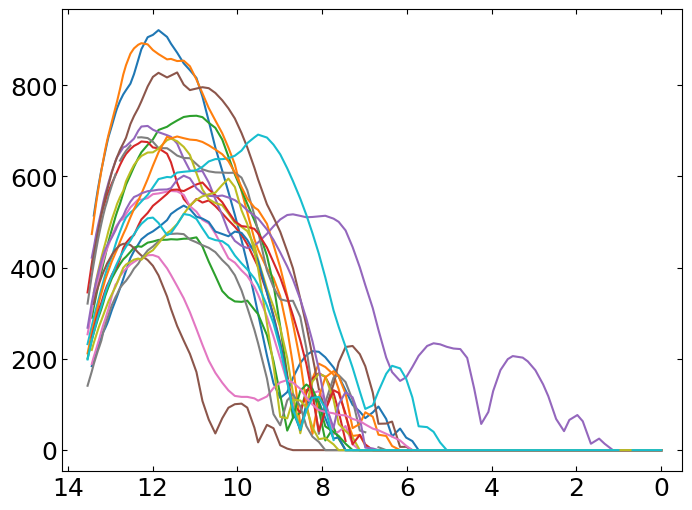

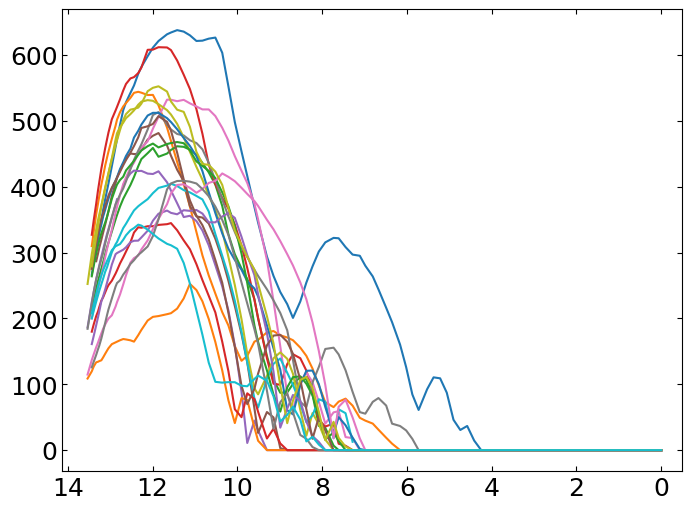

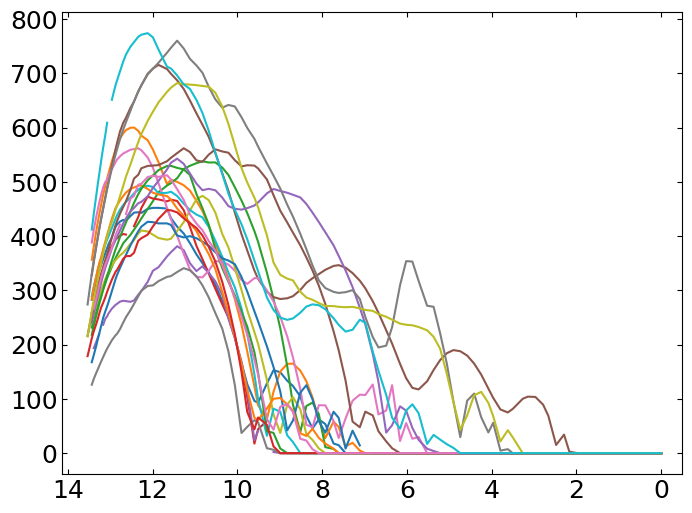

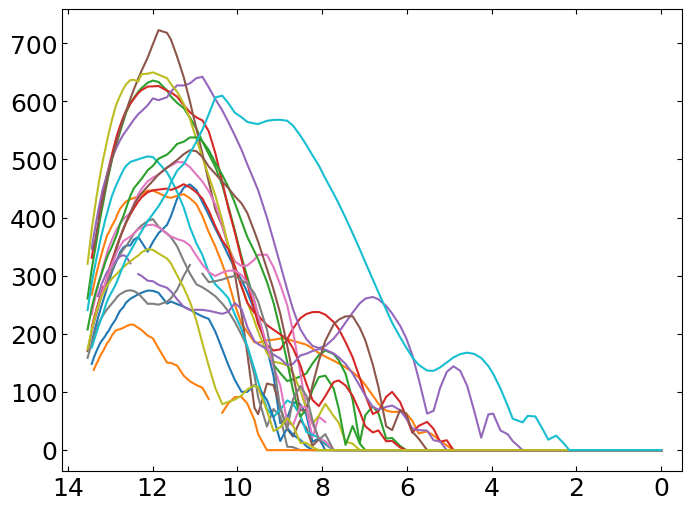

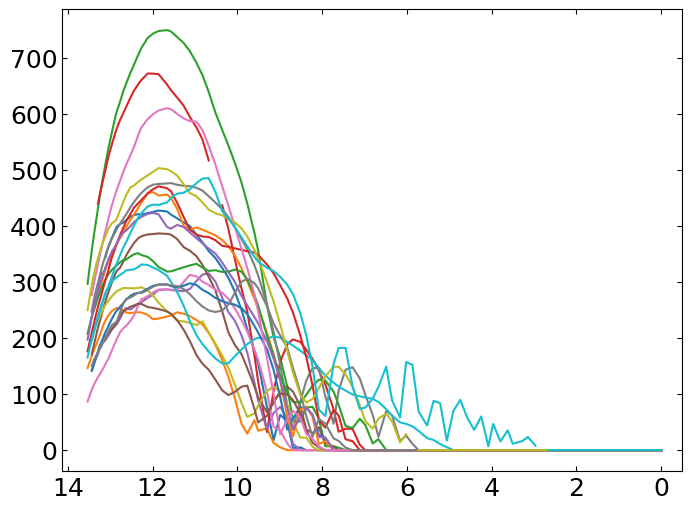

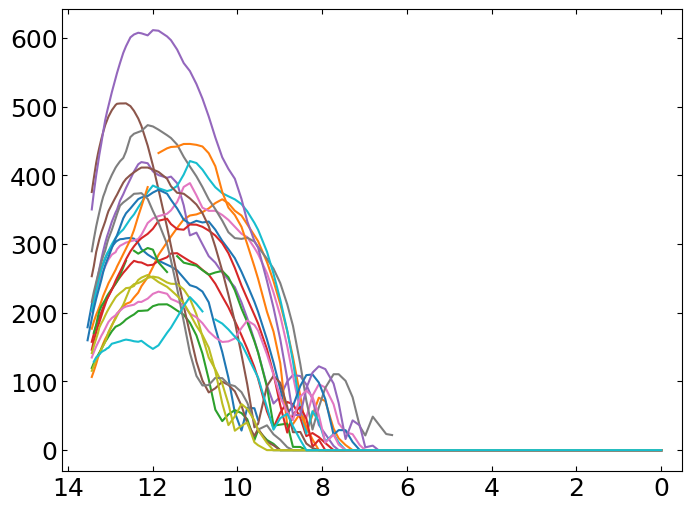

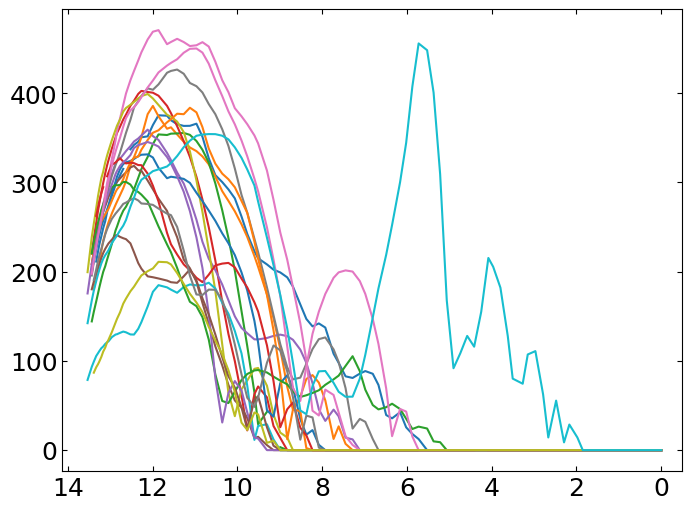

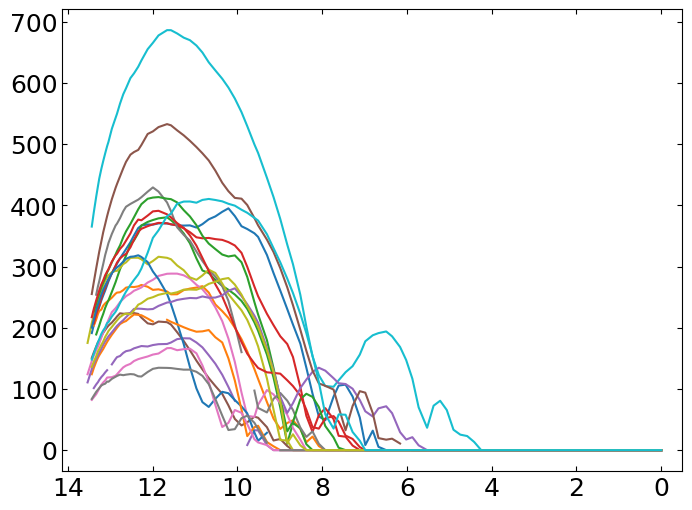

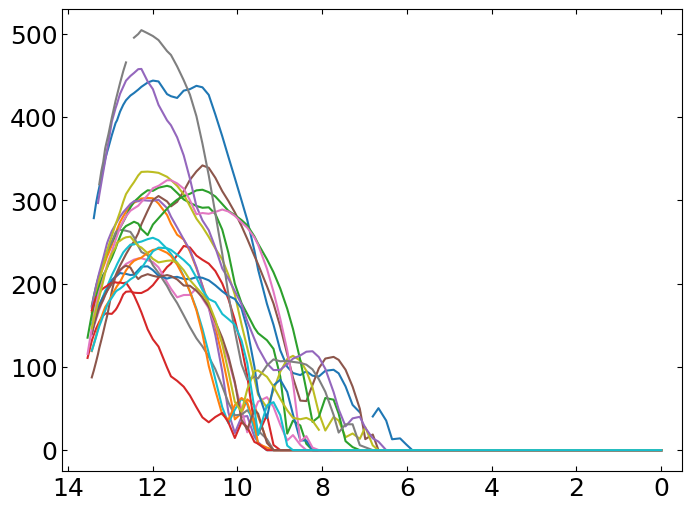

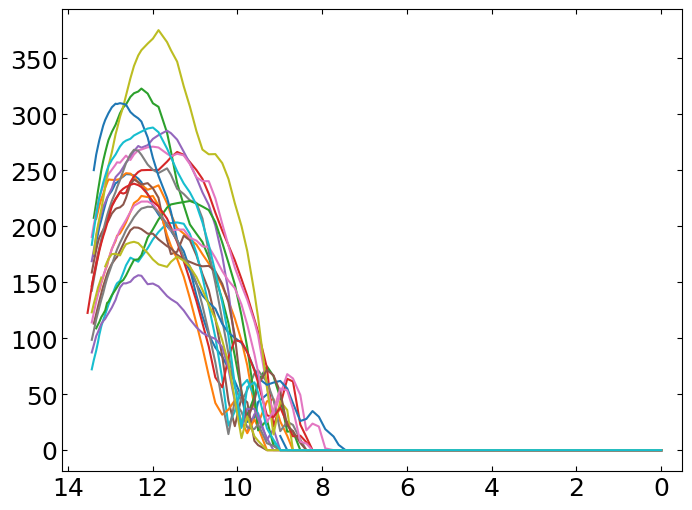

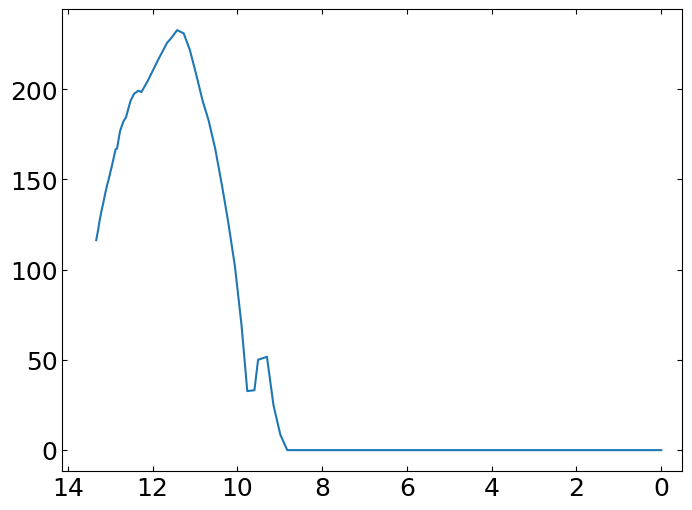

In [23]:

nummergers = len(check_dict['Separations'][mergers])
numnonmergers = len(check_dict['Separations'][nonmergers])


plotnum = 0
for i in range(nummergers):
    if plotnum%20 == 0:
        fig = plt.figure(figsize=(8,6))
    plotnum += 1
    plt.plot(snap_dict['Lookback Time'],check_dict['Separations'][mergers][i])    
#     plt.legend()    
    plt.xlim(np.max(snap_dict['Lookback Time']+0.5),-0.5)
plt.show()


### Plots of pairs that don't merge

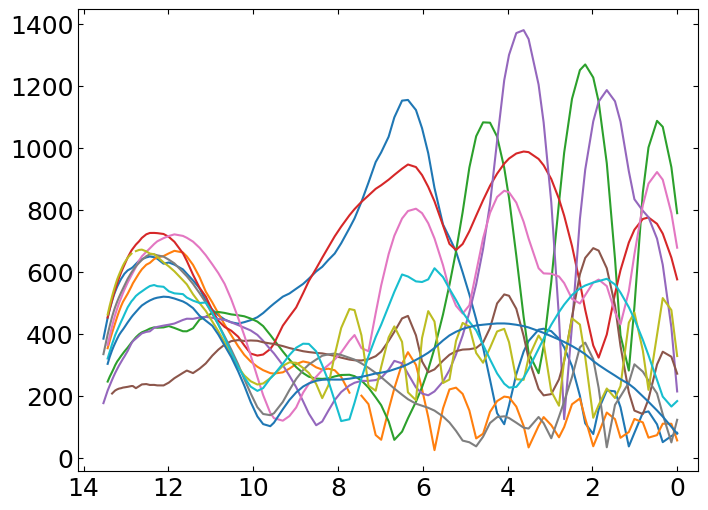

In [25]:

nummergers = len(check_dict['Separations'][mergers])
numnonmergers = len(check_dict['Separations'][nonmergers])

plotnum = 0
for i in range(numnonmergers):
    if plotnum%14 == 0:
        fig = plt.figure(figsize=(8,6))
    plotnum += 1
    plt.plot(snap_dict['Lookback Time'],check_dict['Separations'][nonmergers][i])    
#     plt.legend()    
    plt.xlim(np.max(snap_dict['Lookback Time']+0.5),-0.5)
plt.show()
